In [186]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder
import numpy as np

Is it ordinal or nominal?

It's nominal because it have value 'Unknown'.

Ordinal is
> we all agree that these levels can be ordered in a meaningful way

There is no meaningful where to place Unknown in the ordered list.

Anyway, think of ordinal as 1-axis and nominal as 7-axis ('Unknown', 'High School', etc). If the dataset is non linear, 1-axis will not help the algorithm much while with 6-axis, you can solve non-linear problem with a linear.

In [179]:
education = ['Graduate','High School','Unknown','Uneducated','College','Post-Graduate',
             'Doctorate']
X = pd.DataFrame(data={
    'Education_Level': education + education + education,
    'Age': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
})

In [52]:
ord_enc = OrdinalEncoder(categories=[
    ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
], handle_unknown='use_encoded_value', unknown_value=np.nan).fit(X=X)

X_encoded = ord_enc.transform(X=X)

# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
# X_std = (X_encoded - 0) / (5 - 0)
# X_scaled = X_std * (1 - 0) + 0
# print(X_scaled)

sca = MinMaxScaler().fit(X=X_encoded)

X_scaled = sca.transform(X=X_encoded)
X_scaled

[[0.6]
 [0.2]
 [nan]
 [0. ]
 [0.4]
 [0.8]
 [1. ]]


array([[0.6],
       [0.2],
       [nan],
       [0. ],
       [0.4],
       [0.8],
       [1. ]])

- Define the categories parameter to prevent the encoder from throwing warning to unknown category.

In [201]:
X_train = np.array(['Graduate','High School','Uneducated','College','Post-Graduate',
                    'Doctorate']).reshape(-1,1)

X_nom = X['Education_Level'].values.reshape(-1,1)

ohc_enc = OneHotEncoder(categories=[
    ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
], handle_unknown='infrequent_if_exist', drop='first').fit(X=X_train)

X_encoded_2 = ohc_enc.transform(X=X_nom).toarray()

# print(X_encoded_2)

print(ohc_enc.inverse_transform(X_encoded_2))

[['Graduate']
 ['High School']
 ['Unknown']
 ['Uneducated']
 ['College']
 ['Post-Graduate']
 ['Doctorate']
 ['Graduate']
 ['High School']
 ['Unknown']
 ['Uneducated']
 ['College']
 ['Post-Graduate']
 ['Doctorate']
 ['Graduate']
 ['High School']
 ['Unknown']
 ['Uneducated']
 ['College']
 ['Post-Graduate']
 ['Doctorate']]


1-axis vs 3-axis

In [202]:
import matplotlib.pyplot as plt

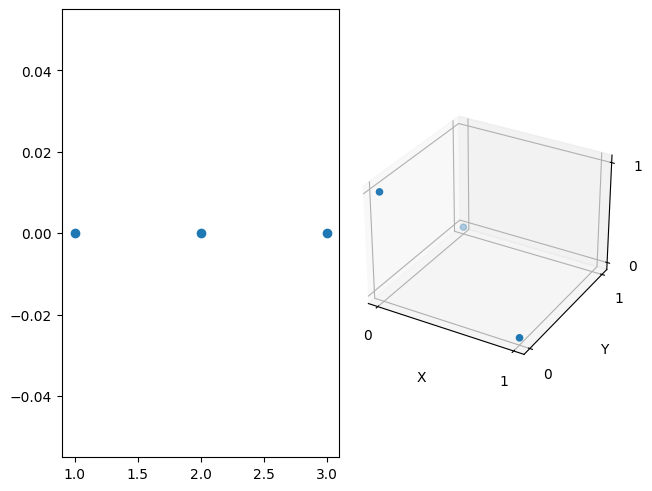

In [218]:
fig = plt.figure(layout="constrained")

ax = fig.add_subplot(1,2,1)

ax.scatter(x=[1,2,3], y=[0,0,0])

ax = fig.add_subplot(1,2,2, projection='3d')

ax.scatter(xs=[1,0,0], ys=[0,1,0], zs=[0,0,1])
ax.set_xticks([0,1])
ax.set_xlabel("X")

ax.set_yticks([0,1])
ax.set_ylabel("Y")

ax.set_zticks([0,1])